In [19]:
from keras.datasets import cifar100
from keras import models
from keras.layers import Dense
from keras.models.cloning import Sequential
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train.shape

x_test.shape

label = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle',
'bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair',
'chimpanzee','clock','cloud','cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant',
'flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard',
'lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange',
'orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
'rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail',
'snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television',
'tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,),name='layer1'))
model.add(Dense(512,activation='relu',name='layer2'))
model.add(Dense(512,activation='relu',name='layer3'))
model.add(Dense(100,activation='softmax',name='layer4'))  
model.summary()

x_train=x_train.reshape((50000,32*32*3)) 
x_train=x_train.astype('float32')/255 
x_test=x_test.reshape((10000,32*32*3))
x_test=x_test.astype('float32')/255
  # one hot encoding 
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data = (x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Accuracy: ',test_acc)
print('Lost: ',test_loss)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layer3 (Dense)              (None, 512)               262656    
                                                                 
 layer4 (Dense)              (None, 100)               51300     
                                                                 
Total params: 2,149,988
Trainable params: 2,149,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
98/98 [==============================] - 13s 125ms/step - loss: 4.3913 - accuracy: 0.0370 - val_loss: 4.1643 - val_accuracy: 0.0586
Epoch 2/20
98/98 [===============

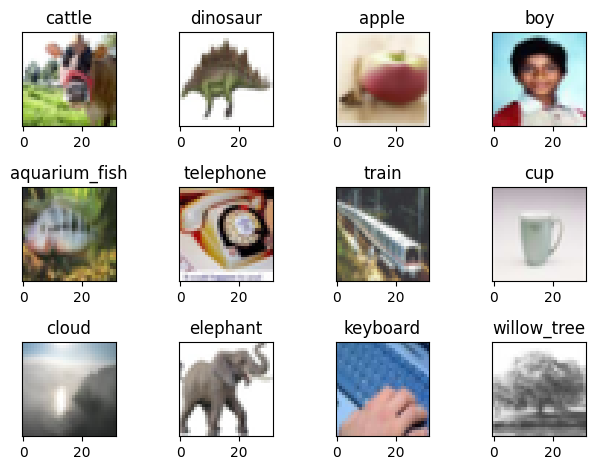

In [43]:
for i in range(12): 
  plt.subplot(3,4,i+1) 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('{}'.format(label[int(y_train[i])]))
  plt.xticks
  plt.yticks([])

In [20]:
model.save('CIFAR100.h5')
model11 = load_model('CIFAR100.h5')
model11.summary()
print(model11.predict([x_test]))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layer3 (Dense)              (None, 512)               262656    
                                                                 
 layer4 (Dense)              (None, 100)               51300     
                                                                 
Total params: 2,149,988
Trainable params: 2,149,988
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 2s 7ms/step
[[6.47159197e-07 2.47442338e-04 1.64313428e-03 ... 1.92505788e-04
  1.34958187e-03 5.24164236e-04]
 [7.75634762e-05 2.118

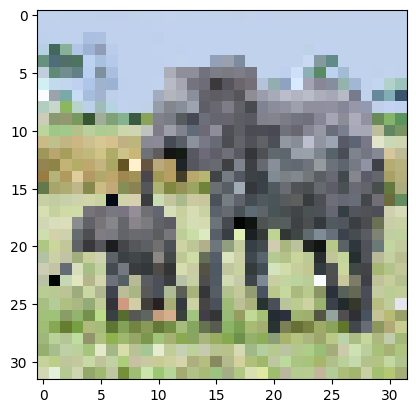

In [21]:
url = r'el.jpg'
img = load_img(url, target_size=(32, 32))
plt.imshow(img)

In [22]:
model1 = load_model('CIFAR100.h5')
img = img_to_array(img)
img = img.reshape(1,3*32*32)
img = img.astype('float32') / 255

label[np.argmax(model1.predict(img))]

1/1 [==============================] - 0s 60ms/step


'elephant'